<a href="https://colab.research.google.com/github/tusker4/Sesac_Saltlux_Team5/blob/taeyongkim/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%8B%A8%EC%9D%BC%EB%AA%A8%EB%8D%B8_%EA%B2%80%EC%A6%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [66]:
# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/머신러닝/playground-series-s3e2/train.csv')
test = pd.read_csv('/content/drive/MyDrive/머신러닝/playground-series-s3e2/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/머신러닝/playground-series-s3e2/sample_submission.csv')

In [67]:
# 훈련 데이터 확인
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [69]:
train.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [70]:
train.shape, test.shape, submission.shape

((15304, 12), (10204, 11), (10204, 2))

In [71]:
train.head(4).T

,0,1,2,3
id,0,1,2,3
gender,Male,Male,Female,Male
age,28.0,33.0,42.0,56.0
hypertension,0,0,0,0
heart_disease,0,0,0,0
ever_married,Yes,Yes,Yes,Yes
work_type,Private,Private,Private,Private
Residence_type,Urban,Rural,Rural,Urban
avg_glucose_level,79.53,78.44,103.0,64.87
bmi,31.1,23.9,40.3,28.8


In [72]:
train = train.drop('id', axis=1)
test = test.drop('id', axis=1)

In [73]:
# 성별
train['gender'] = train['gender'].apply(lambda x: 1 if x =='Female' else 0)
test['gender'] = test['gender'].apply(lambda x: 1 if x =='Female' else 0)

In [74]:
# 나이
train['age'] = train['age'].apply(lambda x: 1 if x >= 19 else 0)
test['age'] = test['age'].apply(lambda x: 1 if x >= 19 else 0)

In [75]:
# 결혼
train['ever_married'] = train['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)
test['ever_married'] = test['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)

In [76]:
# 일
train['work_type'] = train['work_type'].apply(lambda x: 0 if x in('Never_worked','children') else 1)
test['work_type'] = test['work_type'].apply(lambda x: 0 if x in('Never_worked','children') else 1)

In [77]:
# 거주지
train['Residence_type'] = train['Residence_type'].apply(lambda x: 0 if x == 'Urban' else 1)
test['Residence_type'] = test['Residence_type'].apply(lambda x: 0 if x == 'Urban' else 1)

In [78]:
# 혈당
train['avg_glucose_level'] = train['avg_glucose_level'].apply(lambda x: 1 if x> 100 else 0)
test['avg_glucose_level'] = test['avg_glucose_level'].apply(lambda x: 1 if x> 100 else 0)

In [79]:
# bmi
'''
Category	BMI (kg/m2)[c]	BMI Prime[c]
Underweight (Severe thinness)	< 16.0	< 0.64
Underweight (Moderate thinness)	16.0 – 16.9	0.64 – 0.67
Underweight (Mild thinness)	17.0 – 18.4	0.68 – 0.73

Normal range	18.5 – 24.9	0.74 – 0.99

Overweight (Pre-obese)	25.0 – 29.9	1.00 – 1.19
Obese (Class I)	30.0 – 34.9	1.20 – 1.39
Obese (Class II)	35.0 – 39.9	1.40 – 1.59
Obese (Class III)	≥ 40.0	≥ 1.60
'''
def chk_bmi(x):
  result = 2

  if x < 18.5:
    result = 0
  elif x < 25:
    result = 1

  return result

In [80]:
# bmi
train['bmi'] = train['bmi'].apply(chk_bmi)
test['bmi'] = test['bmi'].apply(chk_bmi)

In [81]:
# 흡연
train['smoking_status'] = train['smoking_status'].apply(lambda x: 0 if x in('never smoked','Unknown') else 1)
test['smoking_status'] = test['smoking_status'].apply(lambda x: 0 if x in('never smoked','Unknown') else 1)

In [82]:
import seaborn as sns
# 향후 계속 사용 가능한 모듈
def draw_text_by_ax( ax, data ):
    '''
        ax:차트의 축정보를 접근가능한 객체
        data:표기할 정보를 계산할 데이터(여기서는 비중 x%)
    '''
    #print( '->', ax.patches )
    percents = list() # 카운트 바 별 비율을 저장할 그릇
    for bar in ax.patches: # 개별 바 정보 접근
        percent = bar.get_height() / data.shape[0] * 100 # 개별카운트/전체데이터수
        # bar를 이용하여 바의 좌표 정보 획득
        ax.text( x = bar.get_x() + bar.get_width()/2,
                 y = bar.get_y() + bar.get_height() + data.shape[0]*0.005,
                 s = f'{percent:1.1f} %',
                 ha= 'center'
                 )
        percents.append( percent )
    # 리턴 : 차트축정보, 비중정보
    return ax, percents

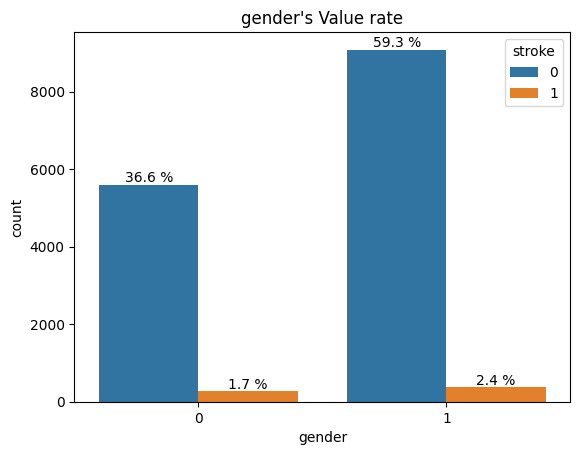

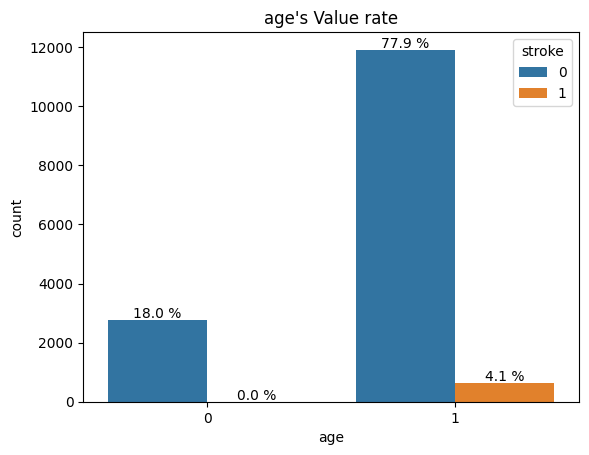

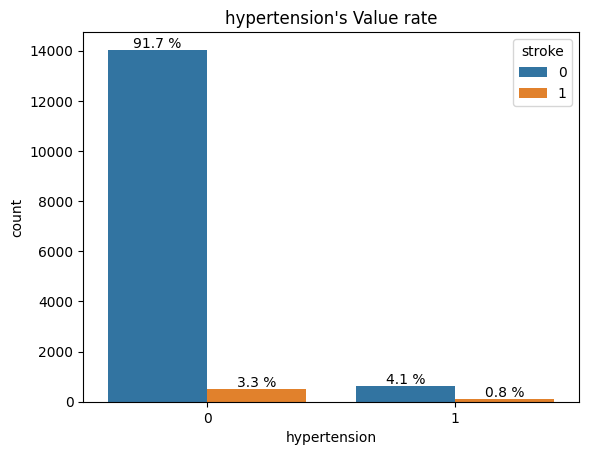

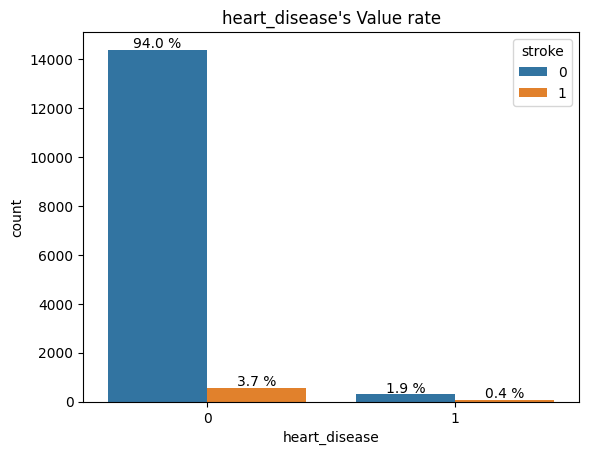

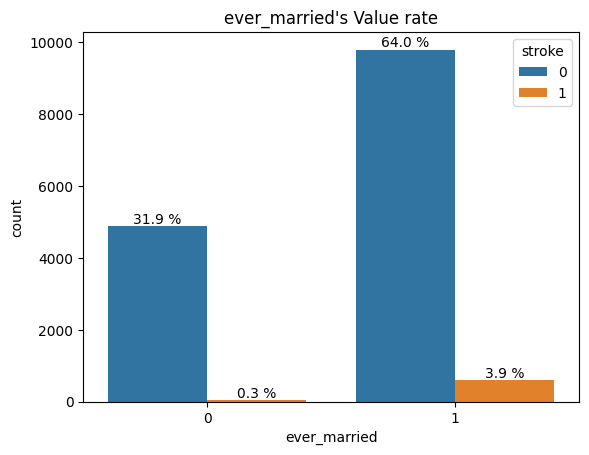

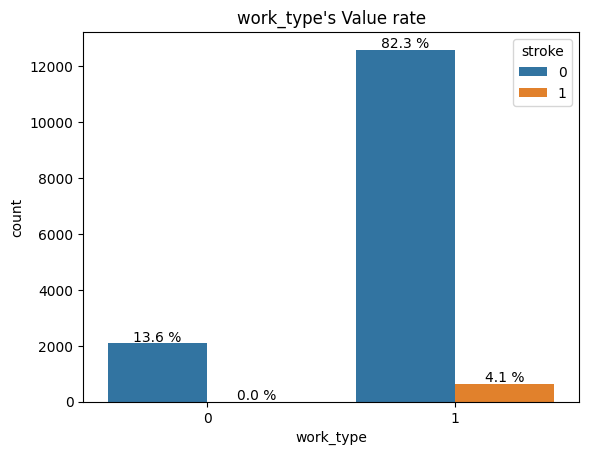

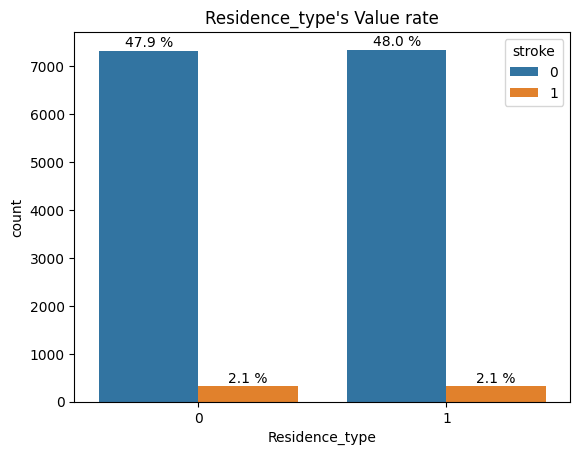

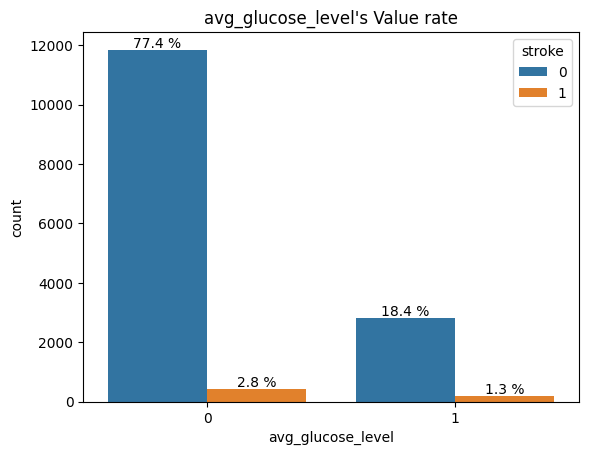

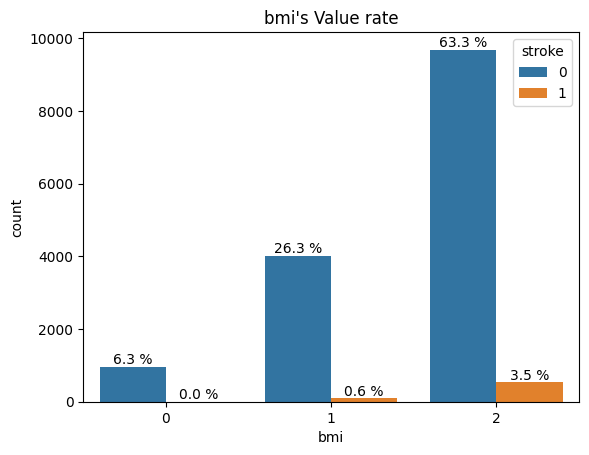

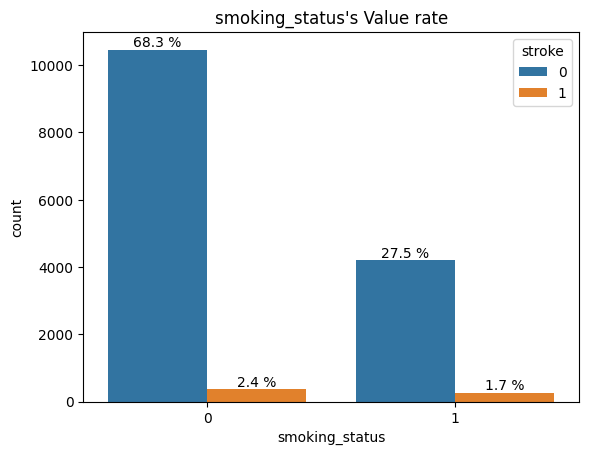

In [85]:
df_logs = dict()
for column in train.columns:
  if column not in('stroke'):
    ax, precents = draw_text_by_ax( sns.countplot( data=train, x=column, hue='stroke'), train )
    # 퍼센트(피처별 비중) 수집
    df_logs[ column ] = precents
    # 차트 출력
    ax.set_title( f'{column}\'s Value rate' )
    plt.show()

# 차이가 다 많이 남 -> 데이터 구분 시 도움 될 듯 -> 모두 학습에 사용

In [86]:
df_logs

{'gender': [36.55253528489284,
  59.317825405122846,
  1.7250392054364874,
  2.4046001045478307],
 'age': [18.00182958703607,
  77.86853110297962,
  0.006534239414532148,
  4.123105070569786],
 'hypertension': [91.73418714061683,
  4.13617354939885,
  3.293256664924203,
  0.836382645060115],
 'heart_disease': [93.96889702038683,
  1.9014636696288552,
  3.698379508625196,
  0.43125980135912184],
 'ever_married': [31.87401986408782,
  63.99634082592787,
  0.2679038159958181,
  3.8617354939884994],
 'work_type': [13.584683742812336,
  82.28567694720334,
  0.006534239414532148,
  4.123105070569786],
 'Residence_type': [47.86330371144798,
  48.0070569785677,
  2.0582854155776267,
  2.071353894406691],
 'avg_glucose_level': [77.43073706220596,
  18.439623627809723,
  2.7966544694197593,
  1.3329848405645583],
 'bmi': [6.318609513852587,
  26.261108207004703,
  63.2906429691584,
  0.013068478829064296,
  0.5880815473078934,
  3.5284892838473603],
 'smoking_status': [68.34161003659173,
  27.52